# **KITASEHAT**

## **Load Data**

In [1]:
!pip install -q Kaggle

In [2]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [3]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d kritikseth/fruit-and-vegetable-image-recognition

 99% 1.97G/1.98G [00:13<00:00, 164MB/s]
100% 1.98G/1.98G [00:13<00:00, 156MB/s]


In [5]:
! unzip /content/fruit-and-vegetable-image-recognition.zip

Archive:  /content/fruit-and-vegetable-image-recognition.zip
  inflating: test/apple/Image_1.jpg  
  inflating: test/apple/Image_10.jpg  
  inflating: test/apple/Image_2.jpg  
  inflating: test/apple/Image_3.jpg  
  inflating: test/apple/Image_4.jpg  
  inflating: test/apple/Image_5.jpg  
  inflating: test/apple/Image_6.JPG  
  inflating: test/apple/Image_7.jpg  
  inflating: test/apple/Image_8.jpg  
  inflating: test/apple/Image_9.jpg  
  inflating: test/banana/Image_1.jpg  
  inflating: test/banana/Image_10.jpg  
  inflating: test/banana/Image_2.jpg  
  inflating: test/banana/Image_3.jpg  
  inflating: test/banana/Image_4.jpg  
  inflating: test/banana/Image_5.jpg  
  inflating: test/banana/Image_6.jpg  
  inflating: test/banana/Image_8.jpg  
  inflating: test/banana/Image_9.jpg  
  inflating: test/beetroot/Image_1.jpg  
  inflating: test/beetroot/Image_10.jpg  
  inflating: test/beetroot/Image_2.jpg  
  inflating: test/beetroot/Image_3.jpg  
  inflating: test/beetroot/Image_4.jpg  


## **Import Libraries**

In [6]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img,img_to_array
print(tf.__version__)

2.9.2


## **Data Preparation**

### **Mendefinisikan setiap folder**

In [7]:
train_dir = Path('/content/train')
train_filepaths = list(train_dir.glob(r'**/*.jpg'))

In [8]:
test_dir = Path('/content/test')
test_filepaths = list(test_dir.glob(r'**/*.jpg'))

In [9]:
val_dir = Path('/content/validation')
val_filepaths = list(test_dir.glob(r'**/*.jpg'))

### **Membuat DataFrame dengan *filepath* dan *label* untuk gambar**

In [10]:
def image_processing(filepath):
    labels = [str(filepath[i]).split("/")[-2] \
              for i in range(len(filepath))]

    filepath = pd.Series(filepath, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')

    # Menggabungkan jalur file dan label
    df = pd.concat([filepath, labels], axis=1)

    # Shuffle DataFrame dan Reset Index
    df = df.sample(frac=1).reset_index(drop = True)
    
    return df

In [11]:
train_df = image_processing(train_filepaths)
test_df = image_processing(test_filepaths)
val_df = image_processing(val_filepaths)

In [12]:
print('Training set')
print(f'Number of pictures: {train_df.shape[0]}')
print(f'Number of different labels: {len(train_df.Label.unique())}\n')
print(f'Labels: {train_df.Label.unique()}')

Training set
Number of pictures: 2780
Number of different labels: 36

Labels: ['cauliflower' 'grapes' 'soy beans' 'paprika' 'raddish' 'cabbage'
 'capsicum' 'pear' 'lemon' 'corn' 'onion' 'mango' 'beetroot' 'potato'
 'jalepeno' 'sweetcorn' 'banana' 'tomato' 'pineapple' 'peas' 'orange'
 'turnip' 'apple' 'bell pepper' 'spinach' 'carrot' 'garlic' 'eggplant'
 'sweetpotato' 'chilli pepper' 'pomegranate' 'kiwi' 'lettuce' 'watermelon'
 'cucumber' 'ginger']


### **Menampilkan DataFrame pada training**

In [16]:
train_df.head()

,Filepath,Label
0,/content/train/cauliflower/Image_71.jpg,cauliflower
1,/content/train/grapes/Image_41.jpg,grapes
2,/content/train/soy beans/Image_70.jpg,soy beans
3,/content/train/paprika/Image_98.jpg,paprika
4,/content/train/raddish/Image_23.jpg,raddish


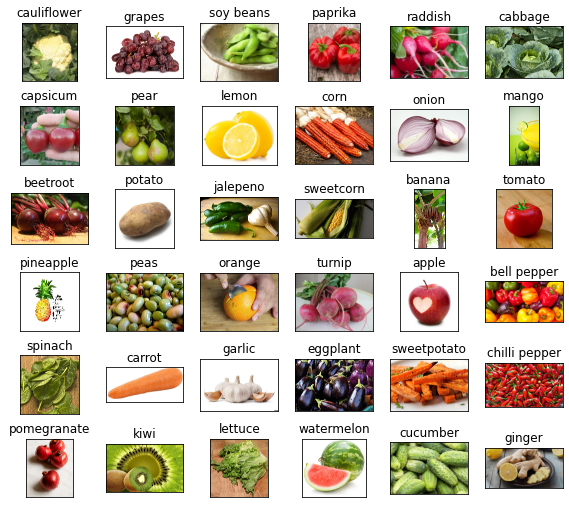

In [17]:
# Membuat DataFrame dengan satu Label dari setiap kategori
df_unique = train_df.copy().drop_duplicates(subset=["Label"]).reset_index()

# Menampilkan beberapa gambar dari kumpulan data
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(8, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df_unique.Filepath[i]))
    ax.set_title(df_unique.Label[i], fontsize = 12)
plt.tight_layout(pad=0.5)
plt.show()

### **Preprocessing Image**

In [18]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input)

In [19]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest")

Found 2780 validated image filenames belonging to 36 classes.


In [20]:
val_images = train_generator.flow_from_dataframe(
    dataframe=val_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest")

Found 334 validated image filenames belonging to 36 classes.


In [21]:
test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False)

Found 334 validated image filenames belonging to 36 classes.


## **Modeling**

### **Pretrained Model menggunakan arsitektur CNN dengan MobileNetV2**

In [24]:
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg')

pretrained_model.trainable = False

### **Melatih Model**

In [25]:
inputs = pretrained_model.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(36, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

history = model.fit(
    train_images,
    validation_data=val_images,
    batch_size = 32,
    epochs=5,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=2,
            restore_best_weights=True)])

Epoch 1/5
 7/87 [=>............................] - ETA: 2:47 - loss: 3.5227 - accuracy: 0.0955

/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


87/87 [==============================] - 216s 2s/step - loss: 1.7282 - accuracy: 0.5284 - val_loss: 0.4628 - val_accuracy: 0.8593
Epoch 2/5
87/87 [==============================] - 210s 2s/step - loss: 0.5540 - accuracy: 0.8245 - val_loss: 0.2776 - val_accuracy: 0.9192
Epoch 3/5
87/87 [==============================] - 208s 2s/step - loss: 0.3325 - accuracy: 0.8982 - val_loss: 0.1995 - val_accuracy: 0.9371
Epoch 4/5
87/87 [==============================] - 210s 2s/step - loss: 0.2117 - accuracy: 0.9320 - val_loss: 0.1790 - val_accuracy: 0.9341
Epoch 5/5
87/87 [==============================] - 208s 2s/step - loss: 0.1410 - accuracy: 0.9576 - val_loss: 0.1546 - val_accuracy: 0.9461


### **Plot Model**

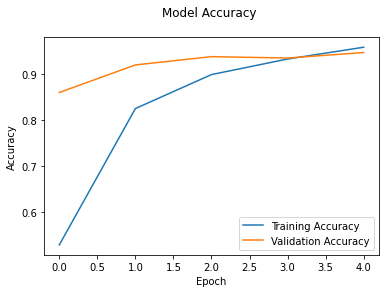

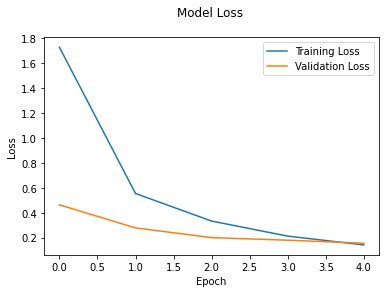

In [26]:
from matplotlib import pyplot as plt

# Melakukan plot pada accuracy train & validation
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy \n')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

print('\n')

# Melakukan plot pada loss train & validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss \n')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

### **Save the Model**

In [43]:
model.save('model.h5')